<a href="https://colab.research.google.com/github/yangyang1598/Deeplearning/blob/main/8_TF_app_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이학습

## 텐서플로우 applications를 이용한 전이학습

[https://www.tensorflow.org/api_docs/python/tf/keras/applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, Model

### 데이터

In [ ]:
from tensorflow.keras import datasets,utils
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

#데이터 전처리
x_train,x_test=x_train/255,x_test/255
#데이터 전처리
y_train=utils.to_categorical(y_train,num_classes=10)
y_test=utils.to_categorical(y_test,num_classes=10)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### 모델 구현

* 모델 불러오기

In [ ]:
base_model=applications.vgg16.VGG16(weights='imagenet',include_top=False,input_shape=[32,32,3]) #include_top: 첫 레이어 가져오기 여부, False: input_shape를 지정, True:input_shape를 안해도 자동으로 이전의 첫 레이어를 가져옴.

base_model.summary()


58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

* 모델 조합하기

In [ ]:
from tensorflow.keras import layers, models

x= base_model.output
y=layers.Flatten(name='Add_flatten')(x)

y=layers.Dense(128,activation='relu')(y) #중간에 들어가는 Dense의 activation은 relu
y=layers.Dense(10,activation='softmax',name='Add_Dense')(y)


model=models.Model(inputs=base_model.input,outputs=y)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

* 컴파일

In [ ]:
for i in range(19):
  print(i,model.layers[i])
  model.layers[i].trainable=False


0 <keras.engine.input_layer.InputLayer object at 0x7f6b9456ec50>
1 <keras.layers.convolutional.Conv2D object at 0x7f6b93238890>
2 <keras.layers.convolutional.Conv2D object at 0x7f6b93238fd0>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f6b9001e4d0>
4 <keras.layers.convolutional.Conv2D object at 0x7f6b900237d0>
5 <keras.layers.convolutional.Conv2D object at 0x7f6b931e2050>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6b9001ecd0>
7 <keras.layers.convolutional.Conv2D object at 0x7f6b90031490>
8 <keras.layers.convolutional.Conv2D object at 0x7f6b900390d0>
9 <keras.layers.convolutional.Conv2D object at 0x7f6b90031a90>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f6b900434d0>
11 <keras.layers.convolutional.Conv2D object at 0x7f6b90046c10>
12 <keras.layers.convolutional.Conv2D object at 0x7f6b9001ed10>
13 <keras.layers.convolutional.Conv2D object at 0x7f6b9003fbd0>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f6b90055cd0>
15 <keras.layers.convolutional.Conv2D object at 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

### 학습

In [ ]:
history=model.fit(x_train,y_train,batch_size=16,epochs=10) #

Epoch 1/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.9929 - acc: 0.6516
Epoch 2/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.9663 - acc: 0.6609
Epoch 3/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.9422 - acc: 0.6691
Epoch 4/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.9192 - acc: 0.6765
Epoch 5/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.8994 - acc: 0.6838
Epoch 6/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.8782 - acc: 0.6898
Epoch 7/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.8600 - acc: 0.6975
Epoch 8/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.8438 - acc: 0.7037
Epoch 9/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.8278 - acc: 0.7092
Epoch 10/10
3125/3125 [==============================] - 46s 15ms/step - loss: 0.8096 - acc: 0.7166


### 평가

In [ ]:

model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.2010 - acc: 0.6070


[1.2009669542312622, 0.6069999933242798]

* 시각화

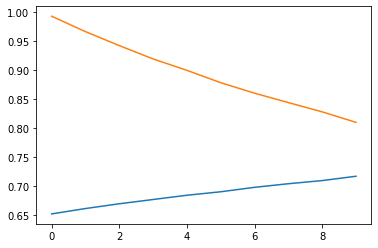

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.show()